In [1]:
from pgmpy.estimators import HillClimbSearch, K2Score, ExhaustiveSearch
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


### Generate synthetic data from a benchmark network
Reference: https://www.bnlearn.com/bnrepository/discrete-small.html#cancer

In [2]:
model = get_example_model("cancer")
df = BayesianModelSampling(model).forward_sample(size = 1000)
df.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,Pollution,Smoker,Cancer,Xray,Dyspnoea
0,low,True,True,positive,True
1,low,False,False,negative,False
2,low,False,False,positive,False
3,low,False,False,negative,True
4,low,True,False,negative,False


### Learn Bayesian network from data

In [3]:
scoring_method = K2Score(data = df)
hc = HillClimbSearch(data = df)
bn = hc.estimate(scoring_method = scoring_method, max_iter = 50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
edges = [e for e in bn.edges()]
print(edges)

[('Pollution', 'Smoker'), ('Cancer', 'Xray'), ('Cancer', 'Smoker'), ('Cancer', 'Dyspnoea')]


### Visualization

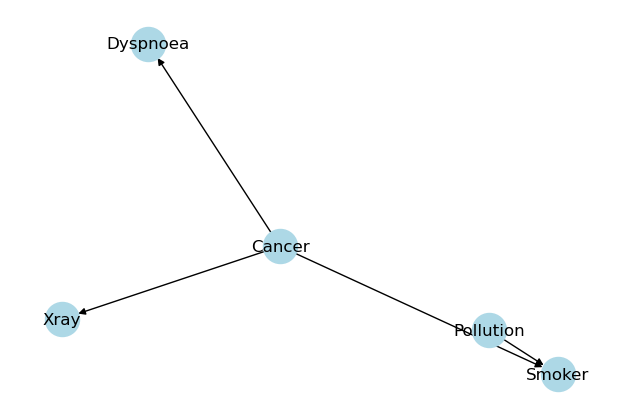

In [5]:
plt.figure(figsize = (6, 4))
g = nx.DiGraph()
g.add_nodes_from(df.columns.values)
g.add_edges_from(edges)
nx.draw(g, with_labels = True, node_color='lightblue', node_size = 600)